In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 4 - Clustering/Section 24 - K-Means Clustering/Python/Mall_Customers.csv')
print(df.head(10))

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [ ]:
x= df.iloc[:,3:].values
# x= df.iloc[:,[3,4]].values
# print(x)

In [ ]:
#no dependent variable

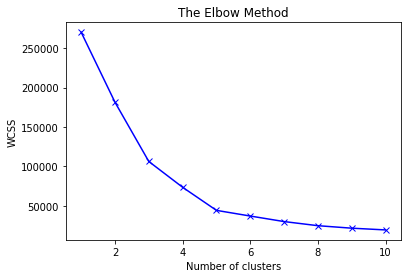

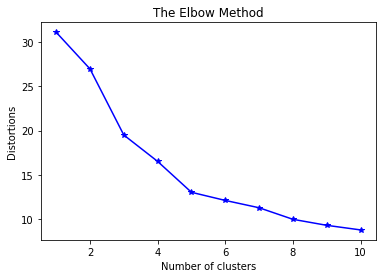

In [ ]:
#elbow mwthod to find optimal no of k clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
wcss = []
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_,'euclidean'), axis=1)) / x.shape[0])
plt.plot(range(1, 11), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print("\n")
plt.plot(range(1, 11), distortions,'b*-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()


In [ ]:
# training the model for optimal value of k
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 40)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=40)

In [ ]:
#prediction
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


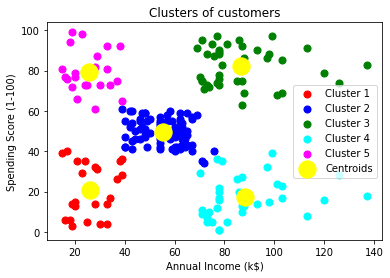

In [ ]:
#visualizing the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()